In [77]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, minmax_scale


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  



In [78]:
data = pd.read_csv('data.csv')

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [79]:
#Before WhiteSpace Deletion
print(data.columns.values)
#rename columns
for orig in data.columns.values:
    data.rename(columns={
        orig: orig.strip()
    }, inplace=True)

#After Whitespace deletion
print(data.columns.values)


#rename income to class
data.rename(columns={ "income": "class" }, inplace=True)




['age' ' workclass' ' fnlwgt' ' education' ' education-num'
 ' marital-status' ' occupation' ' relationship' ' race' ' sex'
 ' capital-gain' ' capital-loss' ' hours-per-week' ' native-country'
 ' income']
['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'income']


In [80]:
#Convert string values to integer
le = LabelEncoder()
data["workclass"] = le.fit_transform(data["workclass"])
data["education"] = le.fit_transform(data["education"])
data["marital-status"] = le.fit_transform(data["marital-status"])
data["occupation"] = le.fit_transform(data["occupation"])
data["relationship"] = le.fit_transform(data["relationship"])
data["race"] = le.fit_transform(data["race"])
data["sex"] = le.fit_transform(data["sex"])
data["native-country"] = le.fit_transform(data["native-country"])
data["class"] = le.fit_transform(data["class"])

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

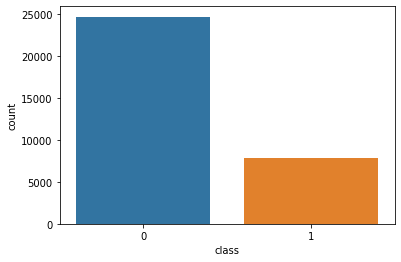

In [81]:
#Checking for missing values
print(data.isnull().sum())

#Data Visualization of Target(class) Variables
sns.countplot(x='class',data =data)


In [82]:
#Normalize

for column in data.columns.values:
    data[column] = minmax_scale(data[column], feature_range=(0,1), axis=0)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


In [83]:
#burada sutunların max,mean,median gibi değelerini hesapladık.
data.agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mad,0.153276,0.105764,0.052708,0.191855,0.126870,0.212978,0.265951,0.279953,0.142724,0.442739,0.019774,0.038214,0.077380,0.100162,0.365641
mean,0.295639,0.483612,0.120545,0.686547,0.605379,0.435306,0.469481,0.289272,0.916464,0.669205,0.010777,0.020042,0.402423,0.895582,0.240810
median,0.273973,0.500000,0.112788,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.951220,0.000000
quantile,0.273973,0.500000,0.112788,0.733333,0.600000,0.333333,0.500000,0.200000,1.000000,1.000000,0.000000,0.000000,0.397959,0.951220,0.000000
kurt,-0.166127,1.682387,6.218811,0.680655,0.623444,-0.536080,-1.234721,-0.768358,4.876310,-1.482709,154.799438,20.376802,2.916687,12.533053,-0.530045
skew,0.558743,-0.752024,1.446980,-0.934042,-0.311676,-0.013508,0.114583,0.786818,-2.435386,-0.719293,11.953848,4.594629,0.227643,-3.658303,1.212430
var,0.034915,0.033122,0.005139,0.066573,0.029417,0.063020,0.091241,0.103269,0.045029,0.221376,0.005454,0.008558,0.015875,0.036414,0.182826


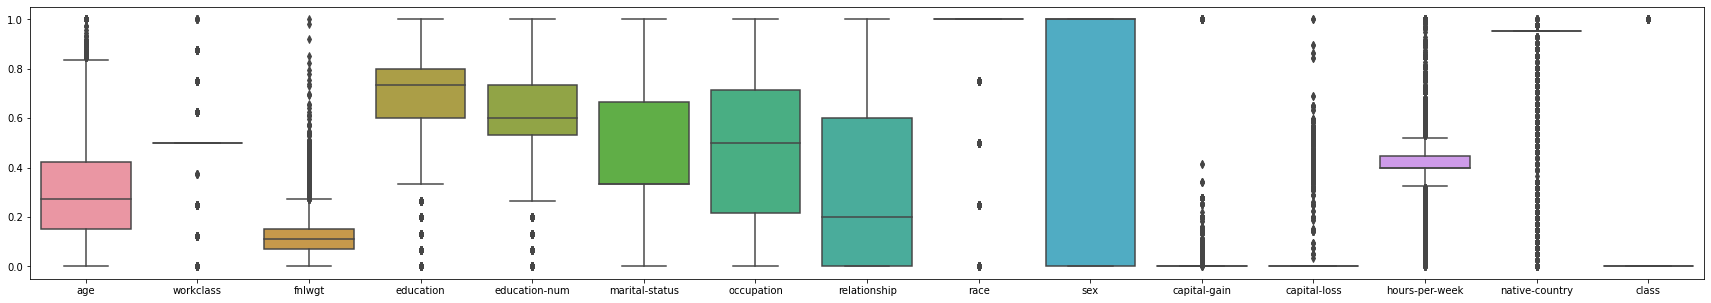

In [84]:
plt.figure(figsize=(30,5))
sns.boxplot(data=data)
plt.show()

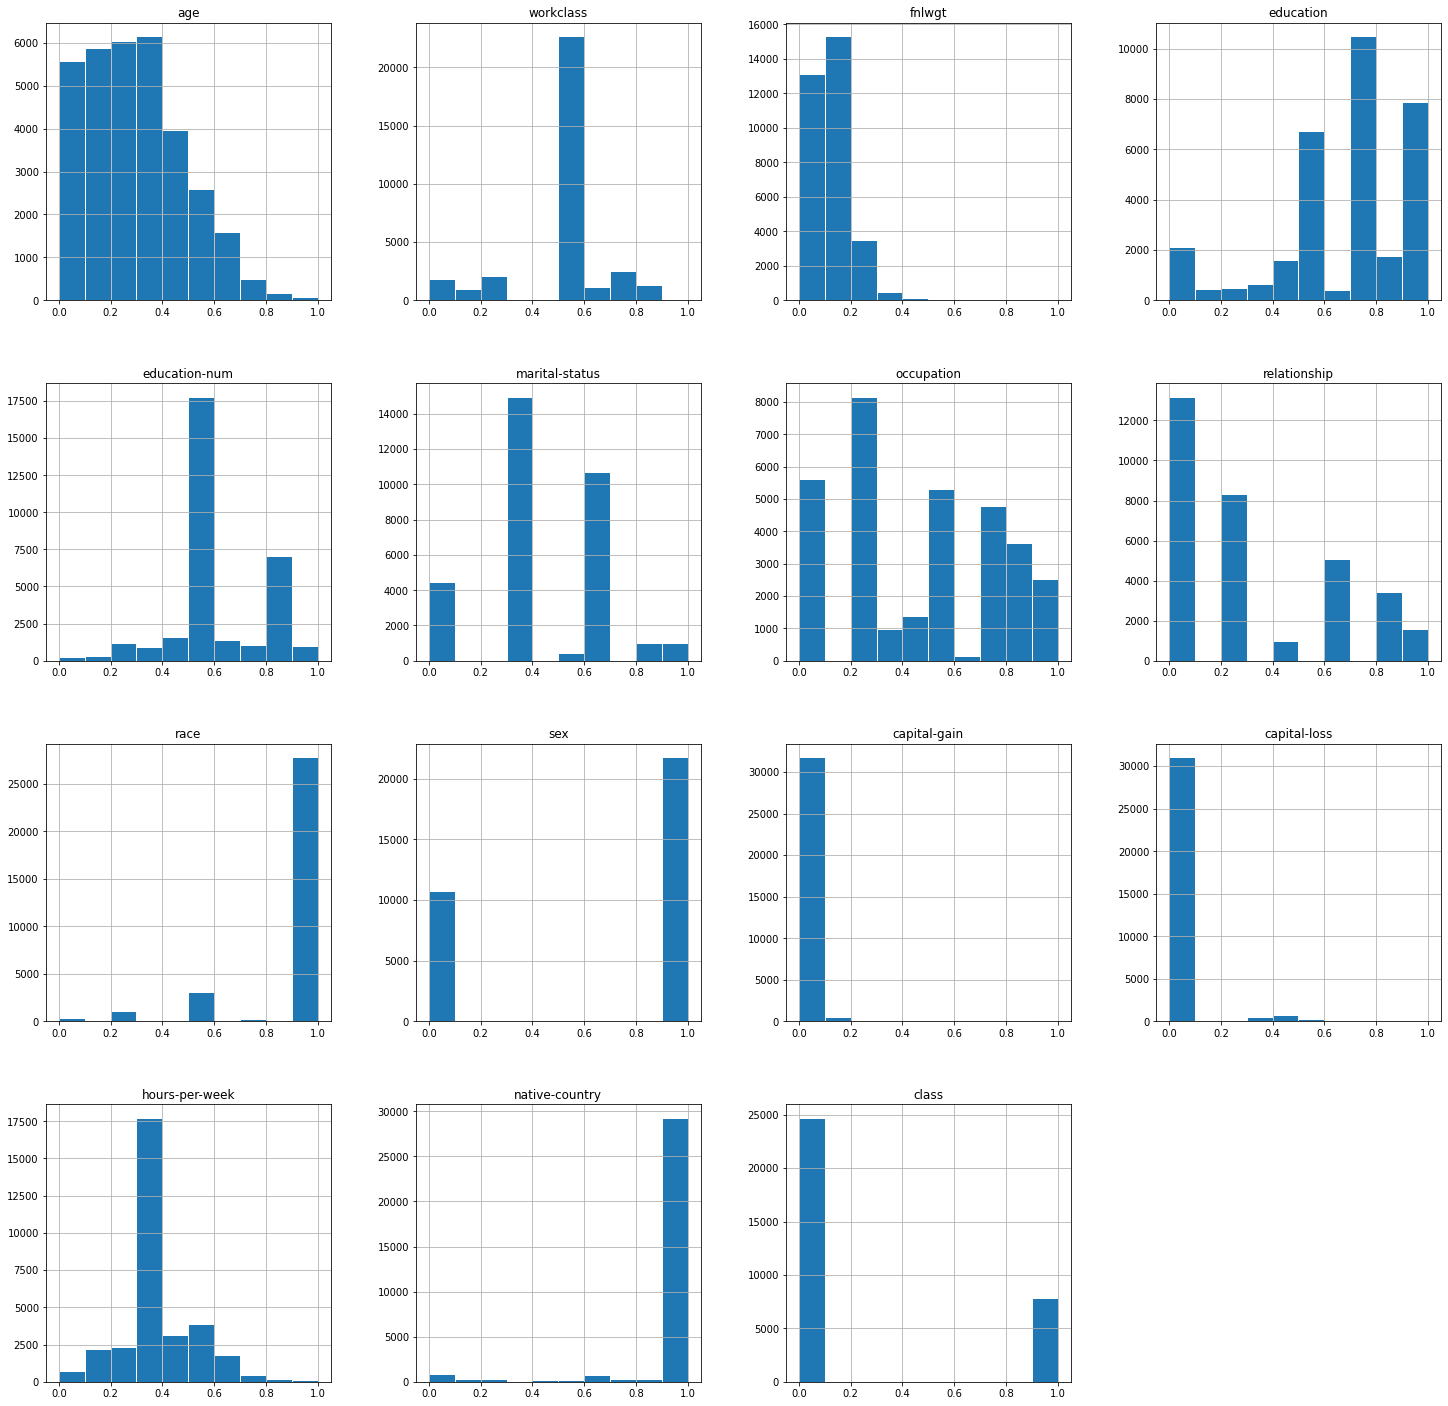

In [85]:
data.hist(figsize=(25,25), ec='w')
plt.show()

In [86]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data.corr().style.applymap(color_)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


Class Distributions: Counter({0.0: 24720, 1.0: 7841})


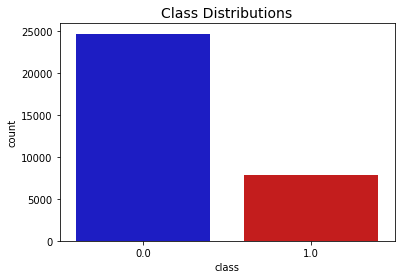

In [87]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=data, palette=colors)
plt.title('Class Distributions', fontsize=14)

values = Counter(data["class"])
print('Class Distributions:', values)


Class Distributions: Counter({0.0: 7841, 1.0: 7841})


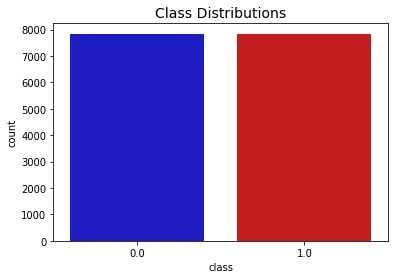

In [88]:
#Random Under Sampling

data = data.sample(frac=1)

class_1 = data.loc[data['class'] == 1]
class_0 = data.loc[data["class"] == 0][:7841]

normal_distributed_data = pd.concat([class_1, class_0])

#Shuffle
new_data = normal_distributed_data.sample(frac=1, random_state=10)

new_data.head()

colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=new_data, palette=colors)
plt.title('Class Distributions', fontsize=14)

print('Class Distributions:', Counter(new_data["class"]))

data = new_data


In [89]:
#Split into train, test 

train_df, test_df = train_test_split(data, test_size=30, random_state=42, shuffle=True)

trainX = train_df.drop('class', axis=1)
trainy = train_df['class']

testX = test_df.drop('class', axis=1)
testy = test_df['class']

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0
)

model.add(Dense(20, input_dim=col_length, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                300       
                                                                 
 dense_51 (Dense)            (None, 10)                210       
                                                                 
 dense_52 (Dense)            (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 3s 1ms/step - loss: 0.6961 - accuracy: 0.4633 - recall_m: 0.3901 - precision_m: 0.2986 - f1_m: 0.3009
Epoch 2/100
1566/1566 [==============================] - 2s 1ms/step - loss: 0.6944 - accuracy: 0.4823 - recall_m: 0.5269 - precision_m: 0.3575 - f1_m: 0.3905
E

In [91]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0
)

model.add(Dense(20, input_dim=col_length, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 20)                300       
                                                                 
 dense_54 (Dense)            (None, 10)                210       
                                                                 
 dense_55 (Dense)            (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 2s 1ms/step - loss: 0.6105 - accuracy: 0.6869 - recall_m: 0.7967 - precision_m: 0.6631 - f1_m: 0.6942
Epoch 2/100
1566/1566 [==============================] - 2s 1ms/step - loss: 0.5939 - accuracy: 0.7183 - recall_m: 0.8306 - precision_m: 0.6822 - f1_m: 0.7229
E

In [98]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.2, momentum=0.6)

model.add(Dense(20, input_dim=col_length, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_174 (Dense)           (None, 20)                300       
                                                                 
 dense_175 (Dense)           (None, 10)                210       
                                                                 
 dense_176 (Dense)           (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 4s 2ms/step - loss: 0.6941 - accuracy: 0.5157 - recall_m: 0.3934 - precision_m: 0.2827 - f1_m: 0.2932
Epoch 2/100
1566/1566 [==============================] - 2s 1ms/step - loss: 0.6908 - accuracy: 0.5465 - recall_m: 0.5803 - precision_m: 0.4313 - f1_m: 0.4534
E

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.2, momentum=0.6)

model.add(Dense(20, input_dim=col_length, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 20)                300       
                                                                 
 dense_178 (Dense)           (None, 10)                210       
                                                                 
 dense_179 (Dense)           (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 4s 2ms/step - loss: 0.5833 - accuracy: 0.7113 - recall_m: 0.8107 - precision_m: 0.6824 - f1_m: 0.7160
Epoch 2/100
1566/1566 [==============================] - 3s 2ms/step - loss: 3.9191 - accuracy: 0.6228 - recall_m: 0.9064 - precision_m: 0.6085 - f1_m: 0.6946
E

In [101]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.6, momentum=0.7)

model.add(Dense(20, input_dim=col_length, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 20)                300       
                                                                 
 dense_184 (Dense)           (None, 10)                210       
                                                                 
 dense_185 (Dense)           (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 3s 2ms/step - loss: 0.6970 - accuracy: 0.4564 - recall_m: 0.5387 - precision_m: 0.3353 - f1_m: 0.3792
Epoch 2/100
1566/1566 [==============================] - 3s 2ms/step - loss: 0.6945 - accuracy: 0.4733 - recall_m: 0.3968 - precision_m: 0.2692 - f1_m: 0.2853
E

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import backend as K

#Classification metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model = Sequential()

col_length = trainX.shape[1]

#default learning rate ve optimzer değerleri
sgdOptimizer = tf.keras.optimizers.SGD(
    learning_rate=0.6, momentum=0.1)

model.add(Dense(20, input_dim=col_length, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy', recall_m, precision_m, f1_m])

model.fit(trainX, trainy, epochs=100, batch_size=10, verbose=True)

_, accuracy, recall, precision, f1_score = model.evaluate(testX, testy)

print('Accuracy: %.2f' % (accuracy*100))
print('Recall: %.2f' % (recall*100))
print('Precision: %.2f' % (precision*100))
print('F1-Score: %.2f' % (f1_score*100))

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_186 (Dense)           (None, 20)                300       
                                                                 
 dense_187 (Dense)           (None, 10)                210       
                                                                 
 dense_188 (Dense)           (None, 1)                 11        
                                                                 
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1566/1566 [==============================] - 4s 2ms/step - loss: 0.5695 - accuracy: 0.7212 - recall_m: 0.8227 - precision_m: 0.6914 - f1_m: 0.7262
Epoch 2/100
1566/1566 [==============================] - 3s 2ms/step - loss: 0.5398 - accuracy: 0.7481 - recall_m: 0.8293 - precision_m: 0.7227 - f1_m: 0.7482
E